### Importing libraries

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Reading the file

In [3]:
df = pd.read_csv('dataset.csv')
print(df)

                                                name  \
0                       2024 Jeep Wagoneer Series II   
1                    2024 Jeep Grand Cherokee Laredo   
2                           2024 GMC Yukon XL Denali   
3                         2023 Dodge Durango Pursuit   
4                              2024 RAM 3500 Laramie   
...                                              ...   
997   2024 Mercedes-Benz Sprinter 2500 Standard Roof   
998           2024 Dodge Hornet Hornet R/T Plus Eawd   
999                          2024 Jeep Wagoneer Base   
1000           2024 Nissan Murano SV Intelligent AWD   
1001                2024 Chevrolet Silverado 2500 WT   

                                            description           make  \
0     \n      \n        Heated Leather Seats, Nav Sy...           Jeep   
1     Al West is committed to offering every custome...           Jeep   
2                                                   NaN            GMC   
3     White Knuckle Clearcoat 2

In [4]:
data_info = {
    "Shape":df.shape,
    "Columns":df.columns.tolist(),
    "Sample":df.head(),
    "Missing Values":df.isnull().sum()
}
data_info

{'Shape': (1002, 17),
 'Columns': ['name',
  'description',
  'make',
  'model',
  'year',
  'price',
  'engine',
  'cylinders',
  'fuel',
  'mileage',
  'transmission',
  'trim',
  'body',
  'doors',
  'exterior_color',
  'interior_color',
  'drivetrain'],
 'Sample':                               name  \
 0     2024 Jeep Wagoneer Series II   
 1  2024 Jeep Grand Cherokee Laredo   
 2         2024 GMC Yukon XL Denali   
 3       2023 Dodge Durango Pursuit   
 4            2024 RAM 3500 Laramie   
 
                                          description   make           model  \
 0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
 1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
 2                                                NaN    GMC        Yukon XL   
 3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
 4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   
 
    year    pr

Cleaning the data

In [6]:
data_clean = df.dropna(subset=['price']).reset_index(drop=True)

Filling missing numerical columns with median values

In [8]:
for col in ['cylinders','mileage','doors']:
    data_clean[col] = data_clean[col].fillna(data_clean[col].median())

Filling missing categorial columns with the mode

In [9]:
for col in ['fuel', 'transmission', 'body', 'exterior_color', 'interior_color']:
    data_clean[col] = data_clean[col].fillna(data_clean[col].mode()[0])

Label Encoding

In [11]:
categorical_cols = ['make', 'model', 'fuel', 'transmission', 'trim', 
                    'body', 'exterior_color', 'interior_color', 'drivetrain']
le = LabelEncoder()
for col in categorical_cols:
    data_clean[col]=le.fit_transform(data_clean[col].astype(str))

Selecting features and target

In [13]:
features = ['year','mileage','cylinders','doors'] + categorical_cols
X = data_clean[features]
y = data_clean['price']

Splitting data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale numerical featrures

In [16]:
scaler = StandardScaler()
X_train[['year', 'mileage', 'cylinders', 'doors']] = scaler.fit_transform(X_train[['year', 'mileage', 'cylinders', 'doors']])
X_test[['year', 'mileage', 'cylinders', 'doors']] = scaler.transform(X_test[['year', 'mileage', 'cylinders', 'doors']])

RandomForestRegressor

In [17]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

Prediction on the test set

In [18]:
y_pred = model.predict(X_test)

Evaluate the model

In [19]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

Feature importance

In [20]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':features, 'Importance':feature_importances}).sort_values(by='Importance', ascending=False)

Plotting actual vs predicted prices and feature importances

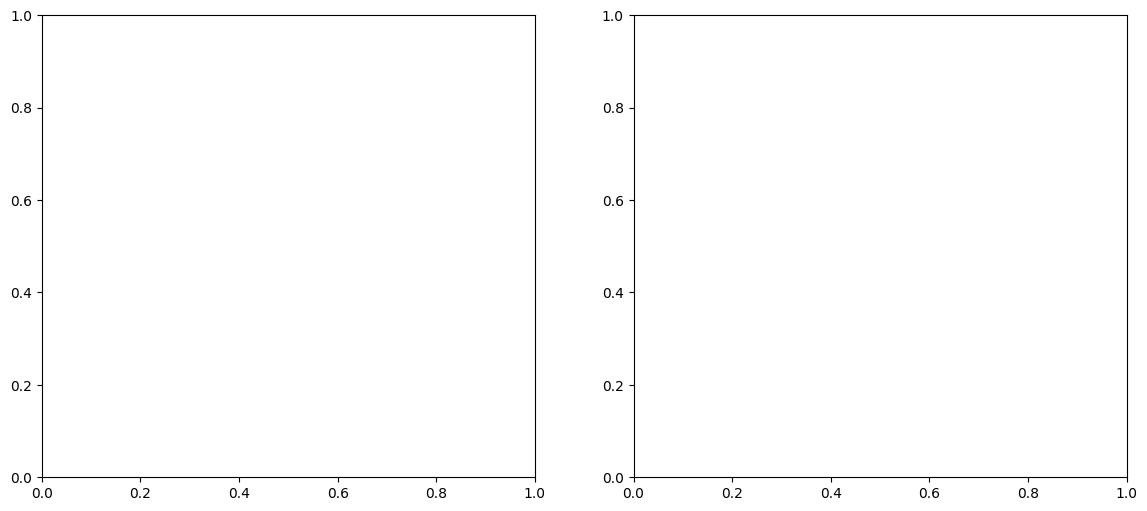

In [21]:
fig, axes = plt.subplots(1,2,figsize=(14,6))

Actual vs Predicted

In [22]:
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
axes[0].set_title('Actual vs Predicted Prices')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')

Text(4.444444444444452, 0.5, 'Predicted Prices')

Feature Importance

In [23]:
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', ax=axes[1])
axes[1].set_title('Feature Importances')

Text(0.5, 1.0, 'Feature Importances')

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
mae, mse, r2, feature_importance_df

(np.float64(4944.886391401258),
 np.float64(72672968.27703181),
 0.7620325527423978,
            Feature  Importance
 6             fuel    0.194624
 5            model    0.189722
 4             make    0.169013
 2        cylinders    0.167446
 8             trim    0.109680
 1          mileage    0.038149
 12      drivetrain    0.034790
 7     transmission    0.028456
 10  exterior_color    0.025229
 9             body    0.021414
 11  interior_color    0.016744
 0             year    0.003067
 3            doors    0.001666)